<a href="https://colab.research.google.com/github/Mmbsaksd/Insurance-Claim/blob/main/Insurance_claim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install scikit-optimize

     |████████████████████████████████| 100 kB 4.1 MB/s 


In [7]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn import ensemble

#**Data Preprocessing**

In [12]:
#Loading Datasets
df = pd.read_csv('/content/train.csv')
df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


In [13]:
df.shape

(52910, 128)

In [14]:
df = df.drop('Id', axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52910 entries, 0 to 52909
Columns: 127 entries, Product_Info_1 to Response
dtypes: float64(101), int64(25), object(1)
memory usage: 51.3+ MB


In [16]:
df.columns

Index(['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_4',
       'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht',
       'Wt',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=127)

In [17]:
#Checking the columns which have above 40% null value with Decending order
missing_value = df.isnull().mean()
missing_value[missing_value>0.4].sort_values(ascending=False)

Medical_History_10     0.990455
Medical_History_32     0.981308
Medical_History_24     0.936061
Medical_History_15     0.750728
Family_Hist_5          0.703742
Family_Hist_3          0.576583
Family_Hist_2          0.482404
Insurance_History_5    0.427783
dtype: float64

In [18]:
#Droping the columns which have null value above 40%
df = df.dropna(thresh = 0.4*df.shape[0],axis=1)

In [19]:
df.isnull().mean()[df.isnull().mean()>0]

Employment_Info_1      0.000340
Employment_Info_4      0.114288
Employment_Info_6      0.181988
Insurance_History_5    0.427783
Family_Hist_2          0.482404
                         ...   
Medical_Keyword_45     0.000019
Medical_Keyword_46     0.000019
Medical_Keyword_47     0.000019
Medical_Keyword_48     0.000019
Response               0.000019
Length: 91, dtype: float64

In [20]:
df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
3,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
4,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


In [21]:
#Dropint three columns due to irrelevent
df.drop(['Insurance_History_5','Family_Hist_2','Family_Hist_3'],axis=1, inplace=True)

In [22]:
df.isnull().mean()[df.isnull().mean()>0].sort_values(ascending=False)

Family_Hist_4         0.323266
Employment_Info_6     0.181988
Medical_History_1     0.149499
Employment_Info_4     0.114288
Employment_Info_1     0.000340
                        ...   
Medical_History_31    0.000019
Medical_History_30    0.000019
Medical_History_29    0.000019
Medical_History_28    0.000019
Response              0.000019
Length: 88, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


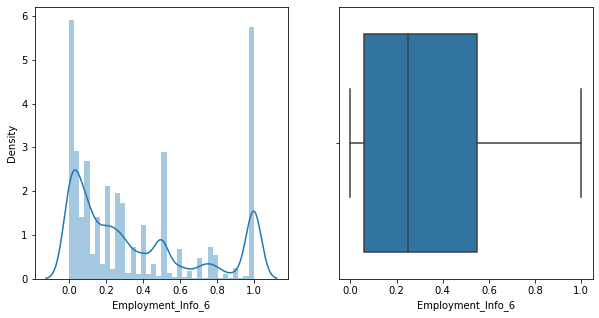

In [23]:
#Checking the distribution and finging outliers
fig, axes = plt.subplots(1,2,figsize = (10,5))
sns.distplot(df['Employment_Info_6'], ax = axes[0])
sns.boxplot(df['Employment_Info_6'], ax = axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


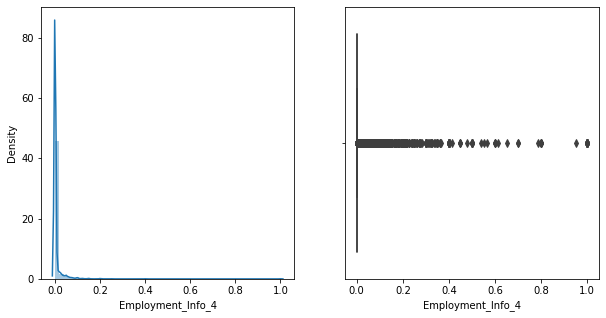

In [24]:
#Checking the distribution and finging outliers
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(df['Employment_Info_4'], ax= axes[0])
sns.boxplot(df['Employment_Info_4'], ax= axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


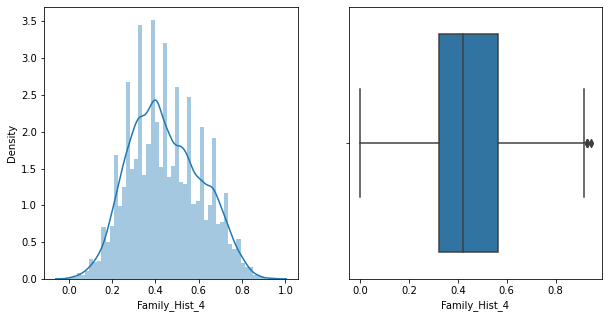

In [25]:
#Checking the distribution and finging outliers
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(df['Family_Hist_4'],ax=axes[0])
sns.boxplot(df['Family_Hist_4'],ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


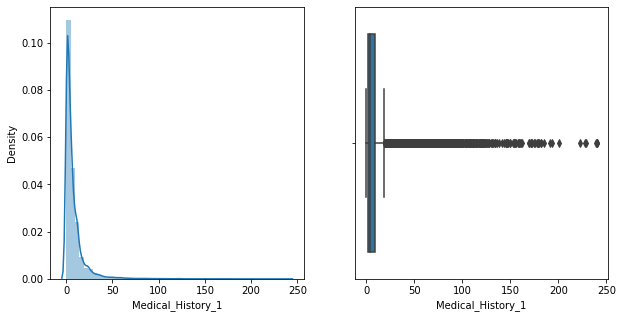

In [26]:
#Checking the distribution and finging outliers
fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(df['Medical_History_1'],ax=axes[0])
sns.boxplot(df['Medical_History_1'],ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


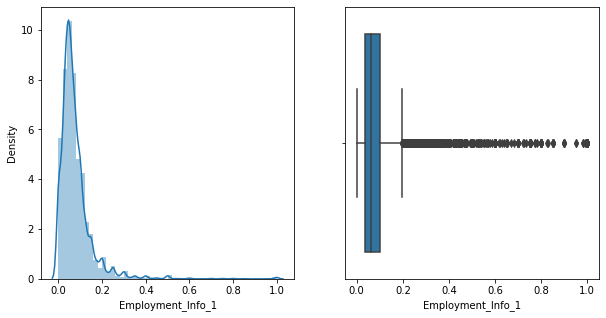

In [27]:
#Checking the distribution and finging outliers
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(df['Employment_Info_1'],ax=axes[0])
sns.boxplot(df['Employment_Info_1'],ax=axes[1])

In [28]:
df.isnull().sum()[df.isnull().mean()>0].sort_values(ascending=False)

Family_Hist_4         17104
Employment_Info_6      9629
Medical_History_1      7910
Employment_Info_4      6047
Employment_Info_1        18
                      ...  
Medical_History_31        1
Medical_History_30        1
Medical_History_29        1
Medical_History_28        1
Response                  1
Length: 88, dtype: int64

In [29]:
#Filling the na value with mean values
df['Family_Hist_1'] = df['Family_Hist_1'].fillna(df['Family_Hist_4'].mean())
df['Employment_Info_6'] = df['Employment_Info_6'].fillna(df['Employment_Info_6'].mean())
df['Medical_History_1'] = df['Medical_History_1'].fillna(df['Medical_History_1'].mean())
df['Employment_Info_4'] = df['Employment_Info_4'].fillna(df['Employment_Info_4'].mean())
df['Employment_Info_1'] = df['Employment_Info_1'].fillna(df['Employment_Info_1'].mean())
df['Family_Hist_4'] = df['Family_Hist_4'].fillna(df['Family_Hist_4'].mean())


In [30]:
#Converting categorical values into numeric
dummies = pd.get_dummies(df['Product_Info_2'])

#Concatinating derived dummies into df
df = pd.concat([df, dummies], axis=1)

#Droping the columns, inwhich its dummies variable are derived
df.drop('Product_Info_2',axis=1, inplace=True)
df

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,B2,C1,C2,C3,C4,D1,D2,D3,D4,E1
0,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,...,0,0,0,0,0,0,0,1,0,0
1,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,...,0,0,0,0,0,0,0,0,0,0
2,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,...,0,0,0,0,0,0,0,0,0,1
3,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,...,0,0,0,0,0,0,0,0,1,0
4,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52905,1,26,1.000000,2,1,1,0.462687,0.800000,0.326360,0.435766,...,0,0,0,0,0,0,0,1,0,0
52906,1,26,0.128205,2,3,1,0.313433,0.672727,0.236402,0.409648,...,0,0,0,0,0,0,0,0,0,0
52907,1,26,0.076923,2,3,1,0.686567,0.636364,0.142259,0.264648,...,0,0,0,0,0,0,1,0,0,0
52908,1,26,0.230769,2,1,1,0.432836,0.727273,0.372385,0.586182,...,0,0,0,0,0,0,0,1,0,0


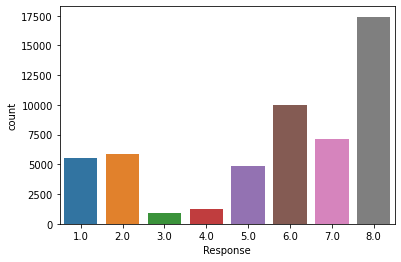

In [31]:
#Graphical representation of the distribution of response
sns.countplot(x = df.Response)

###**Data Preprocessing Summery**


*   One of the columns in dataframe is object type
*   There is no null value in dataset



In [32]:
#Defining the function for converting Target Columns into binary variable
def binary_classification(row):
  if ((row['Response']<= 7) & (row['Response']>0)):
    val = 0
  
  elif (row['Response']==8):
    val = 1

  else:
    val = -1

  return val

In [33]:
#Implimenting the defined function into Target columns
df['Modified_Response'] = df.apply(binary_classification, axis=1)


#Counting the modified response
df['Modified_Response'].value_counts()

 0    35496
 1    17413
-1        1
Name: Modified_Response, dtype: int64

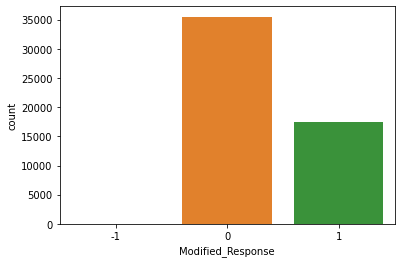

In [34]:
#Graphical Representation of modified response
sns.countplot(x= df['Modified_Response'])

In [35]:
#Droping columns of response
df.drop('Response',axis=1, inplace=True)

df.head()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,C1,C2,C3,C4,D1,D2,D3,D4,E1,Modified_Response
0,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,...,0,0,0,0,0,0,1,0,0,1
1,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,...,0,0,0,0,0,0,0,0,0,0
2,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,...,0,0,0,0,0,0,0,0,1,1
3,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,...,0,0,0,0,0,0,0,1,0,1
4,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,...,0,0,0,0,0,1,0,0,0,1


In [36]:
#Descriptin on datasets
df.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,C1,C2,C3,C4,D1,D2,D3,D4,E1,Modified_Response
count,52910.000000,52910.000000,52910.000000,52910.000000,52910.000000,52910.000000,52910.000000,52910.000000,52910.000000,52910.000000,...,52910.000000,52910.000000,52910.000000,52910.000000,52910.000000,52910.000000,52910.000000,52910.000000,52910.000000,52910.000000
mean,1.026479,24.415404,0.329318,2.006899,2.672614,1.043130,0.405735,0.707279,0.292564,0.469417,...,0.004631,0.002722,0.005198,0.003761,0.111737,0.105802,0.240654,0.180911,0.044472,0.329087
std,0.160556,5.070183,0.282821,0.082771,0.740001,0.290454,0.197138,0.074329,0.089013,0.122192,...,0.067891,0.052098,0.071907,0.061213,0.315045,0.307587,0.427485,0.384948,0.206143,0.469926
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,0.385517,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,0.451275,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.346757,0.532772,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,0.970149,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
#Defining the dependent and independ variable
x = df.drop('Modified_Response', axis=1)
y = df['Modified_Response']

In [38]:
#Spliting the data into traning and testing dataset
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [39]:
#Importing the required model for traning the datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [40]:
#Importing required libraries for evaluating model
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [41]:
#Intializing model on object
lr = LogisticRegression()
rf = RandomForestClassifier()
xg = XGBClassifier()

In [42]:
param_dict_lr = {
    'C':[1e-3,1e-2,1e-1,1,10,100,1e+3]
}

param_dict_rf = {
    'max_depth':[4,6,8],
    'min_samples_leaf':[40, 60],
    'min_samples_split':[50,100,150],
    'n_estimators':[50, 80, 100]
}

param_dict_xgb = {
    'max_depth':[2,10,1],
    'n_estimators':range(60,220,40),
    'learning_rate' : [0.1, 0.05, 0.005,0.0005]
}

In [45]:
#Implimenting Gridsearch with defined parameter
lr_gridsearch = GridSearchCV(estimator = lr,
                             param_grid = param_dict_lr,
                             cv=5, verbose = 2, scoring = 'roc_auc')
lr_gridsearch.fit(xtrain,ytrain)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ............................................C=0.001; total time=   0.1s
[CV] END ............................................C=0.001; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/s

[CV] END ............................................C=0.001; total time=   1.2s
[CV] END ............................................C=0.001; total time=   0.1s
[CV] END ............................................C=0.001; total time=   0.1s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 

[CV] END .............................................C=0.01; total time=   1.1s
[CV] END .............................................C=0.01; total time=   0.1s
[CV] END .............................................C=0.01; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 

[CV] END ..............................................C=0.1; total time=   1.1s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 

[CV] END ................................................C=1; total time=   1.1s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ...............................................C=10; total time=   0.0s
[CV] END ...............................................C=10; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 

[CV] END ...............................................C=10; total time=   1.1s
[CV] END ...............................................C=10; total time=   0.1s
[CV] END ...............................................C=10; total time=   0.1s
[CV] END ..............................................C=100; total time=   0.0s
[CV] END ..............................................C=100; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 

[CV] END ..............................................C=100; total time=   1.3s
[CV] END ..............................................C=100; total time=   0.1s
[CV] END ..............................................C=100; total time=   0.1s
[CV] END ...........................................C=1000.0; total time=   0.0s
[CV] END ...........................................C=1000.0; total time=   0.1s
[CV] END ...........................................C=1000.0; total time=   1.3s
[CV] END ...........................................C=1000.0; total time=   0.1s
[CV] END ...........................................C=1000.0; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 

ValueError: ignored

In [ ]:
#Evaluating the model with train logisticregression
print('Train ROC-AUC Score:', lr_gridsearch.best_estimator_.score(xtrain,ytrain))
print('Test ROC-AUC Scores:', lr_gridsearch.best_estimator_.score(xtest,ytest))

In [ ]:
#Hypertunig the logistic model with RandomsearchCV
lr_randomsearch = RandomizedSearchCV(estimator=lr,
                                     param_distributions= param_dict_lr,
                                     cv=5, verbose=2, scoring='roc_auc')

#Initializing with traning dataset
lr_randomsearch.fit(xtrain,ytrain)


In [ ]:
print('Train ROC_AUC score:', lr_randomsearch.best_estimator_.score(xtrain,ytrain))
print('Test ROC_AUC score:', lr_randomsearch.best_estimator_.score(xtest,ytest))

In [ ]:
#Implimenting the bayessearchcv with logistic regression
lr_bayessearch = BayesSearchCV(estimator=lr,
                               search_spaces={'C':Real(1e-6,1e+6)},
                               cv = 5, verbose =2, scoring='roc_auc',n_iter=32)

#Fitting defined model with traning dataset
lr_bayessearch.fit(xtrain,ytrain)

In [57]:
#Printing the result of bayessearchcv
print("Train ROC_AUC score :", lr_bayessearch.best_estimator_.score(xtrain,ytrain))
print("Test ROC_AUC score :", lr_bayessearch.best_estimator_.score(xtest,ytest))

Train ROC_AUC score : 0.7532628831256315
Test ROC_AUC score : 0.7539782773427633


In [58]:
lr_gridsearch

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000.0]},
             scoring='roc_auc', verbose=2)

In [59]:
lr_randomsearch.best_estimator_

LogisticRegression(C=10)

In [60]:
lr_bayessearch.best_estimator_

LogisticRegression(C=390397.67437486054)

In [46]:
#Implimenting the gridsearchcv with randomforest
rf_gridsearch = GridSearchCV(estimator=rf,
                             param_grid=  param_dict_rf,
                             cv = 5, verbose=2, scoring='roc_auc')


#Fitting defined model into train dataset
rf_gridsearch.fit(xtrain,ytrain)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.4s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 60],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [47]:
#Printing the score on trained model on roc_auc
print('Train ROC_AUC score :', rf_gridsearch.best_estimator_.score(xtrain, ytrain))
print('Test ROC_AUC score :', rf_gridsearch.best_estimator_.score(xtest,ytest))

Train ROC_AUC score : 0.8109001347254968
Test ROC_AUC score : 0.810979203502568


In [52]:
#Hyper tuning the model with randomsearch on random forest
rf_randomsearch = RandomizedSearchCV(estimator=rf,
                                     param_distributions= param_dict_rf,
                                     cv = 5, verbose=2, scoring='roc_auc')

#Initializing the defined random forest model
rf_randomsearch.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.9s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.2s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.1s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.4s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.8s
[CV] END max_depth=6, min_samp

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 60],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   scoring='roc_auc', verbose=2)

In [53]:
print('Train ROC_AUC score :',rf_randomsearch.best_estimator_.score(xtrain,ytrain))
print('Test ROC_AUC score :', rf_randomsearch.best_estimator_.score(xtest, ytest))

Train ROC_AUC score : 0.8076162007409903
Test ROC_AUC score : 0.8082849204344531


In [61]:
#Initializing GridsearchCV with XGBoosting
xgb_gridsearch = GridSearchCV(estimator=xg,
                              param_grid=param_dict_xgb,
                              cv=5, verbose=2, scoring='roc_auc')

#Implimenting train dataset with gridsearch xgboost
xgb_gridsearch.fit(xtrain,ytrain)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   7.2s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   5.1s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   5.0s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   6.8s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   7.4s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=  10.0s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   9.8s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   7.5s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   7.5s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   7.4s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=140; total time=  10.3s
[CV] END ...learning_rate=0.1, max_depth=2, n_e

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.005, 0.0005],
                         'max_depth': [2, 10, 1],
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=2)

In [62]:
print('Train ROC_AUC score :', xgb_gridsearch.best_estimator_.score(xtrain,ytrain))
print('Test ROC_AUC score :', xgb_gridsearch.best_estimator_.score(xtest,ytest))

Train ROC_AUC score : 0.8841781744695184
Test ROC_AUC score : 0.8343857876568157


In [1]:
#Initializing the randomsearch with XGBoost
xgb_randomsearch = RandomizedSearchCV(estimator=xg,
                                      param_distributions=param_dict_xgb,
                                      cv=5, verbose=2, scoring='roc_auc') 

#Implimenting the defined randomsearch with XGBoost
xgb_randomsearch.fit(xtrain,ytrain)

NameError: ignored

In [ ]:
print('train ROC_AUC score :', xgb_randomsearch.best_estimator_.score(xtrain,ytrain))
print('Test ROC_AUC score :', xgb_randomsearch.best_estimator_.score(xtest,ytest))